In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Зчитуємо та виводимо вихідне зображення

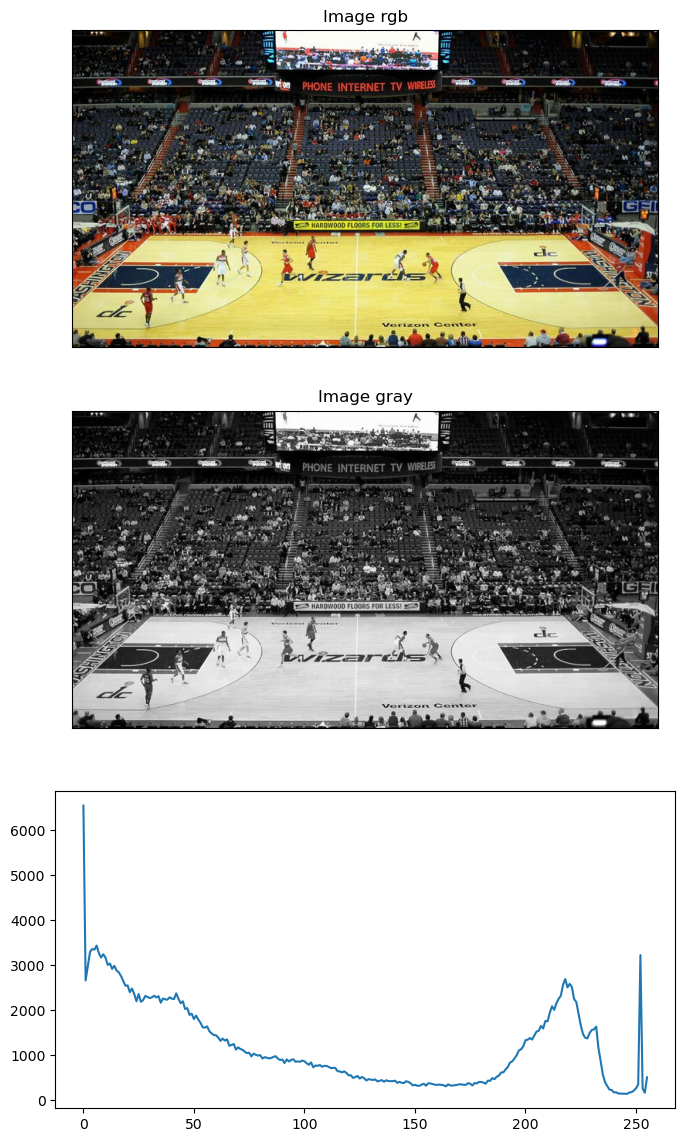

In [2]:
img = cv2.imread("basketball.jpg", cv2.IMREAD_GRAYSCALE)
img_rgb = cv2.cvtColor(cv2.imread("basketball.jpg"), cv2.COLOR_BGR2RGB)

hist = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.figure(figsize=(8, 14))
plt.subplot(311), plt.imshow(img_rgb), plt.xticks([]), plt.yticks([]), plt.title("Image rgb")
plt.subplot(312), plt.imshow(img, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("Image gray")
plt.subplot(313), plt.plot(hist)
plt.show();

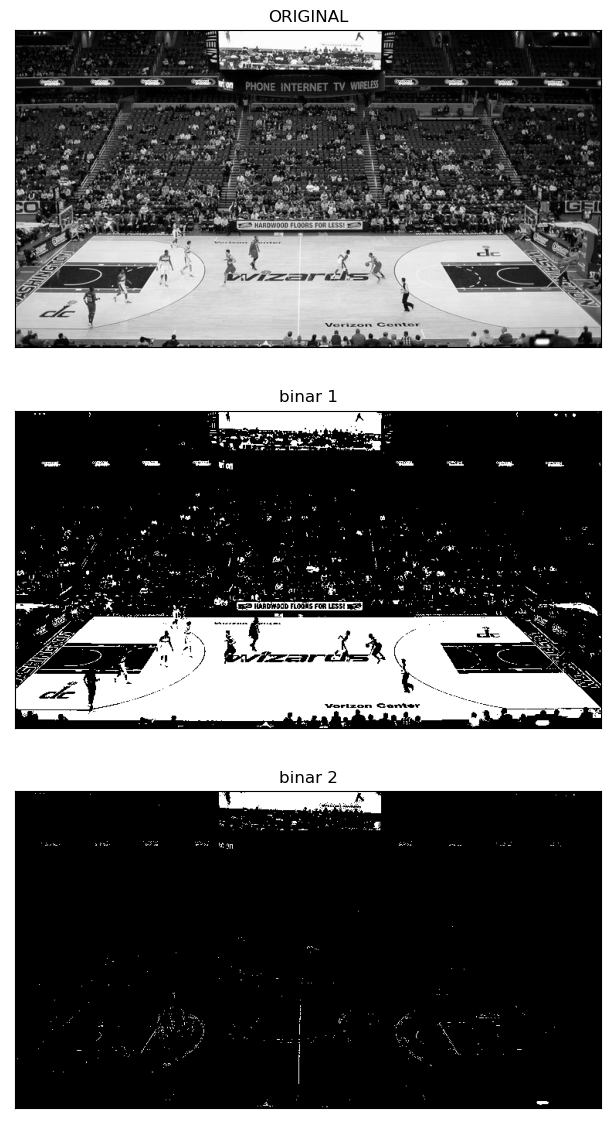

In [3]:
max_value = 255

threshold = 170
img_bin_1 = cv2.threshold(img, threshold, max_value, cv2.THRESH_BINARY)[1]

threshold = 240
img_bin_2 = cv2.threshold(img, threshold, max_value, cv2.THRESH_BINARY)[1]

plt.figure(figsize=(8, 14))
plt.subplot(311), plt.imshow(img, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("ORIGINAL")
plt.subplot(312), plt.imshow(img_bin_1, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("binar 1")
plt.subplot(313), plt.imshow(img_bin_2, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("binar 2")

plt.show()

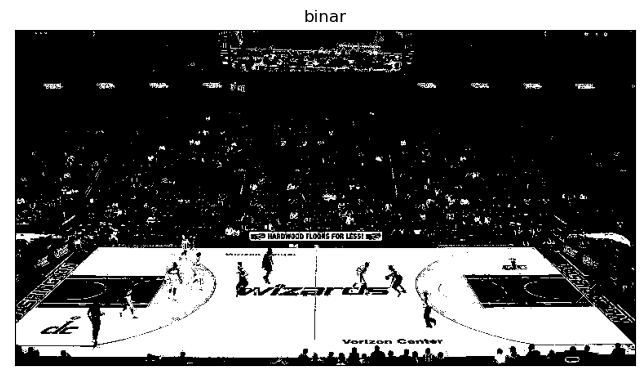

In [4]:
img_bin = img_bin_2 - img_bin_1

plt.figure(figsize=(8, 14))
plt.imshow(img_bin, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("binar")
plt.show()

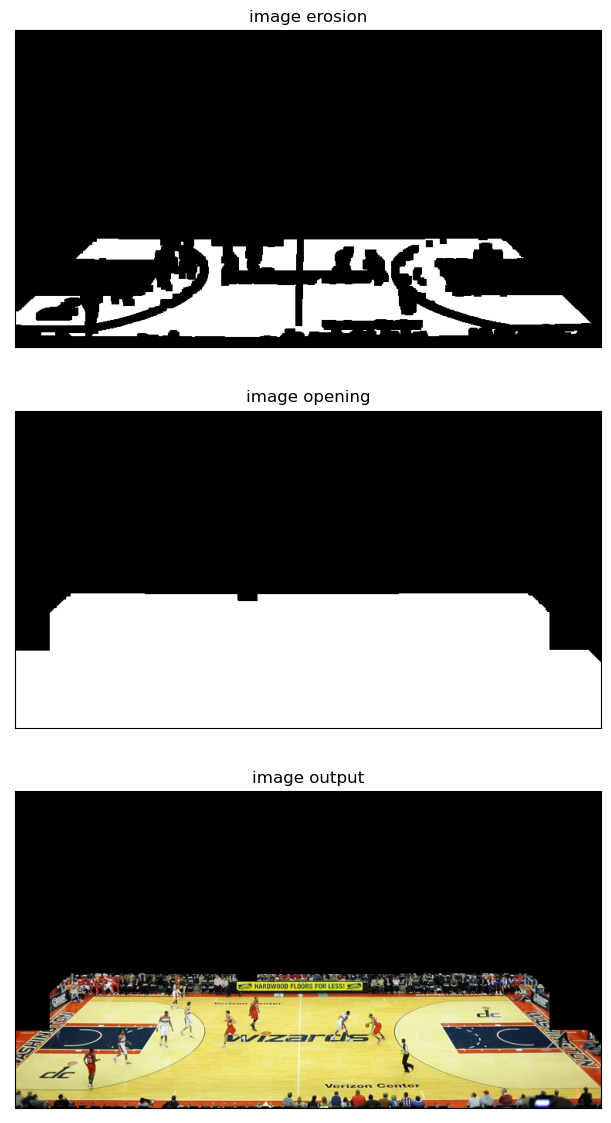

In [5]:
n = ([5,5])
kernel = np.ones(n, np.uint8)

img_erosion = cv2.erode(img_bin, kernel, iterations = 2)

img_opening = cv2.morphologyEx(img_erosion, cv2.MORPH_GRADIENT, kernel, iterations = 17) #17 ітерацій бо з 15 остаєься декілька пікселів не закращених

img_output = cv2.bitwise_and(img_rgb, img_rgb, mask = img_opening) 

plt.figure(figsize=(8, 14))
plt.subplot(311), plt.imshow(img_erosion, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("image erosion")
plt.subplot(312), plt.imshow(img_opening, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("image opening")
plt.subplot(313), plt.imshow(img_output), plt.xticks([]), plt.yticks([]), plt.title("image output")
plt.show()